**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [294]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [295]:
x = [i for i in range(25)]

In [296]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=False):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is False:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

In [297]:
err = []
y = []
x = [i for i in range(25)]
for i in range(len(x)):
    temp = line(2, x[i])
    #print(temp)
    temp = temp + np.random.randn(1) * errors(x[i])
    print(temp)
    err.append(errors(x[i]))
    y.append(temp)
    #y.append(line(2, x[i]))

[0.]
[3.74788499]
[4.01017843]
[4.44882801]
[7.32372302]
[6.74754856]
[11.10968584]
[16.47500373]
[11.04317993]
[18.48654378]
[19.36416342]
[22.17667675]
[26.0227093]
[34.17494228]
[26.71660261]
[25.27765961]
[31.09861824]
[38.32820874]
[33.41471533]
[39.10704098]
[44.63667966]
[41.41670044]
[43.59905255]
[47.9505934]
[40.07440821]


Text(0.5,1,'line with errorbars, slope=2, y-intercept=0')

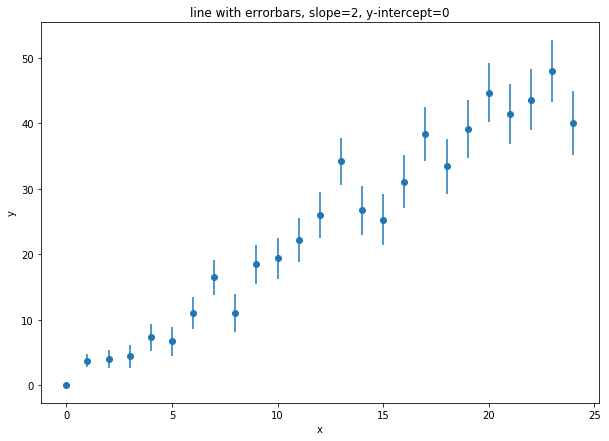

In [298]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
ax.errorbar(x, y, 
            yerr = err, fmt = '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('line with errorbars, slope=2, y-intercept=0')

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [299]:
y = list(y)
y[0]

array([0.])

In [300]:
y1 = []
for i in range(len(y)):
    y1.append(y[i])
y1

[array([0.]),
 array([3.74788499]),
 array([4.01017843]),
 array([4.44882801]),
 array([7.32372302]),
 array([6.74754856]),
 array([11.10968584]),
 array([16.47500373]),
 array([11.04317993]),
 array([18.48654378]),
 array([19.36416342]),
 array([22.17667675]),
 array([26.0227093]),
 array([34.17494228]),
 array([26.71660261]),
 array([25.27765961]),
 array([31.09861824]),
 array([38.32820874]),
 array([33.41471533]),
 array([39.10704098]),
 array([44.63667966]),
 array([41.41670044]),
 array([43.59905255]),
 array([47.9505934]),
 array([40.07440821])]

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [301]:
print(y, x)

[array([0.]), array([3.74788499]), array([4.01017843]), array([4.44882801]), array([7.32372302]), array([6.74754856]), array([11.10968584]), array([16.47500373]), array([11.04317993]), array([18.48654378]), array([19.36416342]), array([22.17667675]), array([26.0227093]), array([34.17494228]), array([26.71660261]), array([25.27765961]), array([31.09861824]), array([38.32820874]), array([33.41471533]), array([39.10704098]), array([44.63667966]), array([41.41670044]), array([43.59905255]), array([47.9505934]), array([40.07440821])] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [302]:
print(sm.add_constant(x))

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]]


In [303]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [304]:
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1798.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.44e-24
Time:                        19:14:45   Log-Likelihood:                -64.704
No. Observations:                  25   AIC:                             131.4
Df Residuals:                      24   BIC:                             132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9902      0.047     42.398      0.000       1.893       2.087
==============================================================================
Omnibus:                        2.236   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                0.904
Skew:                           0.132   Prob(JB):                        0.636
Kurtosis:                       3.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
#THE RIGHT WAY
X = sm.add_constant(x)
smfit2 = smf.OLS(y, X).fit()
smfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     458.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.09e-16
Time:                        19:14:45   Log-Likelihood:                -64.704
No. Observations:                  25   AIC:                             133.4
Df Residuals:                      23   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0481      1.303     -0.037      0.971      -2.744       2.648
x1             1.9932      0.093     21.411      0.000       1.801       2.186
==============================================================================
Omnibus:                        2.254   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                0.920
Skew:                           0.121   Prob(JB):                        0.631
Kurtosis:                       3.908   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
slope = np.array([smfit2.params[1]])
inter = np.array([smfit2.params[0]])
slope

array([1.99318218])

# 4. plot the data (as points) and both statsmodels fits

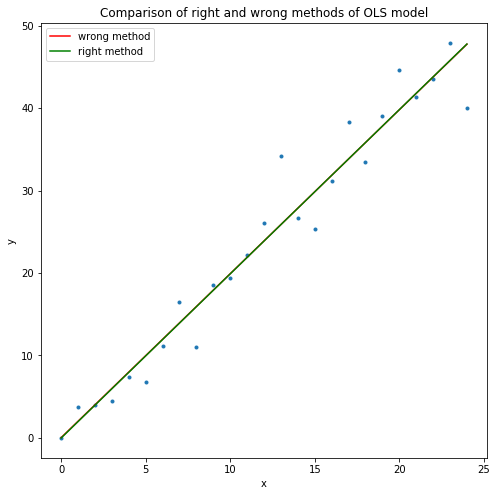

In [307]:
pl.figure(figsize=(8,8))
pl.plot(x, y, '.')
plt.plot(x, x*smfit1.params, color='red', label='wrong method')
plt.plot(x, x*slope + inter, color='green', label='right method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of right and wrong methods of OLS model')
plt.legend()

Although no big difference can be seen here between the two models, the wrong method can usually lead to different results from different kinds of data.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [308]:
err = []
slope = 1.9
intercept = 109*slope
y = []
x = [i for i in range(25)]
for i in range(len(x)):
    temp = line(slope, x[i], b=intercept)
    #print(temp)
    temp = temp + np.random.randn(1) * errors(x[i])
    print(temp)
    err.append(errors(x[i]))
    y.append(temp)

[207.1]
[209.04425032]
[209.93443442]
[211.85164742]
[212.00070333]
[215.0898533]
[217.73793686]
[224.01401711]
[223.18779522]
[226.30904876]
[226.13111546]
[234.47157768]
[230.37927483]
[233.9755921]
[231.91479641]
[240.02997282]
[232.15220398]
[240.07720797]
[242.0548114]
[244.61242981]
[246.63089165]
[247.52380972]
[248.13221792]
[246.42200589]
[254.91996622]


Text(0.5,1,'Plot with slope 1.9 and y-intercept 109*1.9 along with error bars ')

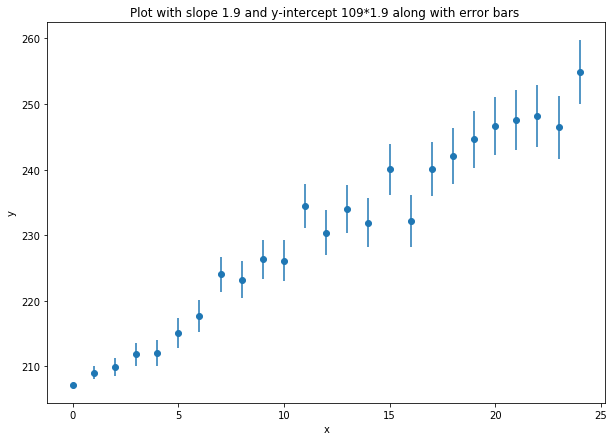

In [309]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
ax.errorbar(x, y, 
            yerr = err, fmt = '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot with slope 1.9 and y-intercept 109*1.9 along with error bars ')

# 6. repeat step 3

In [310]:
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     87.95
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.70e-09
Time:                        19:14:46   Log-Likelihood:                -152.25
No. Observations:                  25   AIC:                             306.5
Df Residuals:                      24   BIC:                             307.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.6029      1.557      9.378      0.000      11.389      17.817
==============================================================================
Omnibus:                        4.131   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                1.516
Skew:                          -0.021   Prob(JB):                        0.469
Kurtosis:                       1.794   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
X = sm.add_constant(x)
smfit2 = smf.OLS(y, X).fit()
smfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     701.0
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           9.89e-19
Time:                        19:14:46   Log-Likelihood:                -58.359
No. Observations:                  25   AIC:                             120.7
Df Residuals:                      23   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.2799      1.011    204.993      0.000     205.188     209.372
x1             1.9123      0.072     26.477      0.000       1.763       2.062
==============================================================================
Omnibus:                        1.692   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                0.518
Skew:                           0.027   Prob(JB):                        0.772
Kurtosis:                       3.703   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The huge difference in R2 values indicate that using the wrong method can lead us to wrong fitting of the line and thus can explain the model wrongly

In [312]:
slope = np.array([smfit2.params[1]])
inter = np.array([smfit2.params[0]])

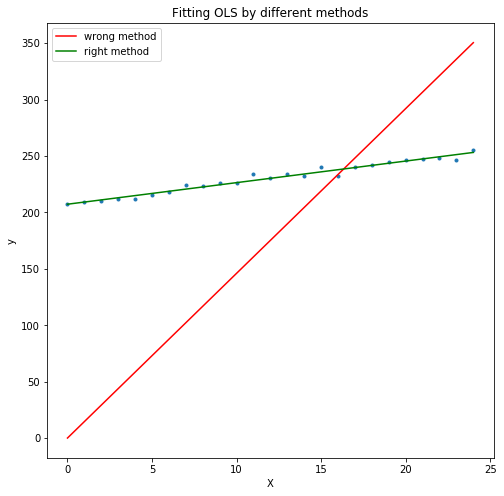

In [313]:
pl.figure(figsize=(8,8))
pl.plot(x, y, '.')
plt.plot(x, x*smfit1.params, color='red', label='wrong method')
plt.plot(x, x*slope + inter, color='green', label='right method')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitting OLS by different methods')
plt.legend()

This shows the we can get vastly different results when we use the wrong method of ols fitting.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [269]:
weights = 1/np.sqrt(y)
#print(weights)
model = smf.WLS(y, X, weights=weights).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            WLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     330.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.88e-15
Time:                        17:24:17   Log-Likelihood:                -68.625
No. Observations:                  25   AIC:                             141.3
Df Residuals:                      23   BIC:                             143.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.5272      1.504    137.349      0.000     203.417     209.638
x1             1.9786      0.109     18.169      0.000       1.753       2.204
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.147
Skew:                           0.456   Prob(JB):                        0.564
Kurtosis:                       3.519   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The high r2 value of 0.935 with the WLS model indicated that the model is explaining the data with great accuracy

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)